<a href="https://colab.research.google.com/github/Himangi-77/excelR-assignments/blob/main/ASSIGNMENT15_RANDOMFOREST_FRAUDCHECK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [2]:
data = pd.read_csv('/content/Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


**EXPLORATORY DATA ANALYSIS**

In [3]:
data.rename(columns={'Marital.Status':'Marital_Status','Taxable.Income':'Income','City.Population':'Population','Work.Experience':'Experience'},inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Undergrad       600 non-null    object
 1   Marital_Status  600 non-null    object
 2   Income          600 non-null    int64 
 3   Population      600 non-null    int64 
 4   Experience      600 non-null    int64 
 5   Urban           600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.astype({'Undergrad':'category','Marital_Status':'category','Urban':'category'})

,Undergrad,Marital_Status,Income,Population,Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
le = LabelEncoder()
data.iloc[:,0]=le.fit_transform(data.iloc[:,0])
data.iloc[:,1]=le.fit_transform(data.iloc[:,1])
data.iloc[:,-1]=le.fit_transform(data.iloc[:,-1])
data.head()

,Undergrad,Marital_Status,Income,Population,Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


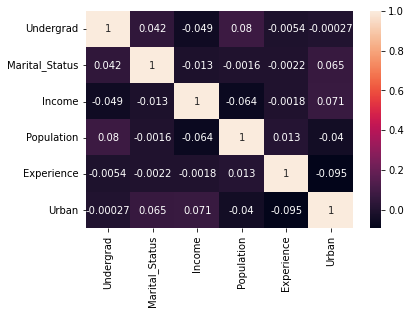

In [7]:
sns.heatmap(data.corr(),annot=True)

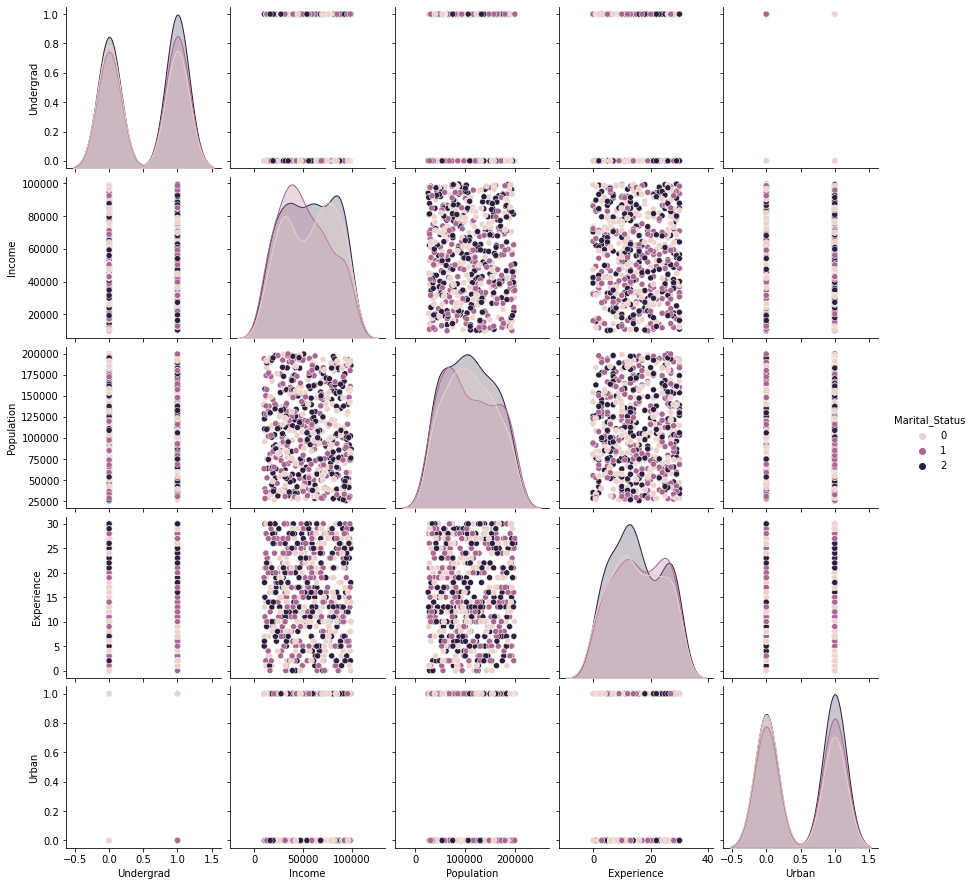

In [8]:
sns.pairplot(data=data,hue='Marital_Status')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


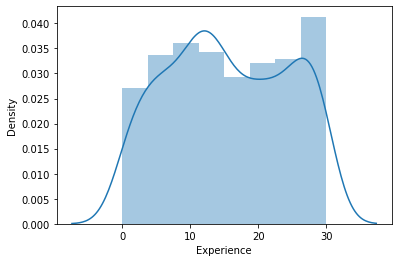

In [9]:
sns.distplot(data['Experience'])

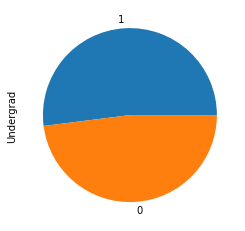

In [13]:
import matplotlib.pyplot as plt
data.Undergrad.value_counts().plot(kind='pie')

{'whiskers': [<matplotlib.lines.Line2D at 0x7efe41232e90>,
 'caps': [<matplotlib.lines.Line2D at 0x7efe411c2650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efe41232ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efe41134490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efe411349d0>],
 'means': []}

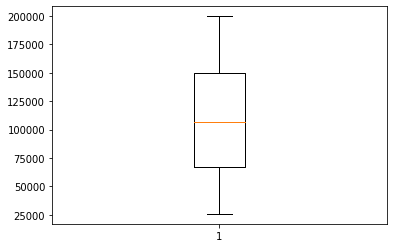

In [14]:
plt.boxplot(data['Population'],vert=True)

**DATA PREPROCESSING**

In [15]:
data['Income'] = data['Income'].apply(lambda x: "Risky" if(x<=30000) else "Good")
data.head()

,Undergrad,Marital_Status,Income,Population,Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0


In [16]:
data['Income'] = pd.get_dummies(data['Income'],drop_first=True)
data.head() #Risky:1 Good:0

,Undergrad,Marital_Status,Income,Population,Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


**MODEL BUILDING**

In [17]:
x = data.drop(['Income'],axis=1)
y = data.iloc[:,2]

In [24]:
kfold = KFold(n_splits=10,random_state=7,shuffle=True)
model1 = RandomForestClassifier(n_estimators=100,max_features=3,criterion='entropy')
model2 = RandomForestClassifier(n_estimators=100,max_features=4)
model3 = RandomForestClassifier(n_estimators=100,max_features=3)
model4 = RandomForestClassifier(n_estimators=100,max_features=2,criterion='entropy')
model5 = RandomForestClassifier(n_estimators=150,max_features=5)
model6 = RandomForestClassifier(n_estimators=50,max_features=4,criterion='gini')
model7 = RandomForestClassifier(n_estimators=200,max_features=3,criterion='entropy')

In [25]:
results1 = cross_val_score(model1,x,y,cv=kfold)
results2 = cross_val_score(model2,x,y,cv=kfold)
results3 = cross_val_score(model3,x,y,cv=kfold)
results4 = cross_val_score(model4,x,y,cv=kfold)
results5 = cross_val_score(model5,x,y,cv=kfold)
results6 = cross_val_score(model6,x,y,cv=kfold)
results7 = cross_val_score(model7,x,y,cv=kfold)
print(results1.mean(),results2.mean(),results3.mean(),results4.mean(),results5.mean(),results6.mean(),results7.mean())

0.7516666666666666 0.7366666666666666 0.7466666666666667 0.7466666666666666 0.7483333333333333 0.7499999999999999 0.7366666666666666


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

In [26]:
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)

In [27]:
#Accuracy
metrics.accuracy_score(y_test,y_pred)

0.7575757575757576

In [28]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Income,,
0,148,10
1,38,2


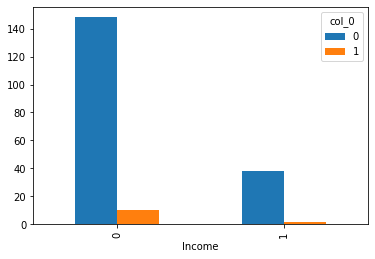

In [29]:
pd.crosstab(y_test,y_pred).plot(kind='bar')

In [30]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).tail(30)

,Actual,Predicted
410,0,0
257,0,0
29,0,0
431,0,0
331,1,0
469,0,0
300,0,0
550,0,1
53,1,0
510,0,0
